In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import thalesians.tsa.filtering as filtering
import thalesians.tsa.numpyutils as npu
import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim

## Univariate Ornstein-Uhlenbeck process

In [4]:
X = proc.OrnsteinUhlenbeckProcess(transition=1., vol=1.)
x0 = 0.

In [5]:
X

OrnsteinUhlenbeckProcess(process_dim=1, noise_dim=1, transition=[[ 1.]], mean=[[ 0.]], vol=[[ 1.]])

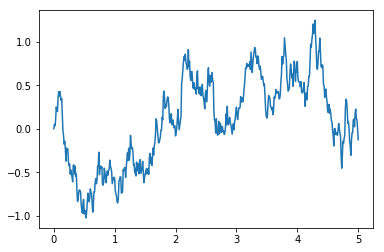

In [6]:
rnd.random_state(np.random.RandomState(seed=42), force=True)
em = sim.EulerMaruyama(process=X, initial_value=x0, times=sim.xtimes(start=0., stop=5., step=.01))
df = sim.run(em)
plt.plot(df);

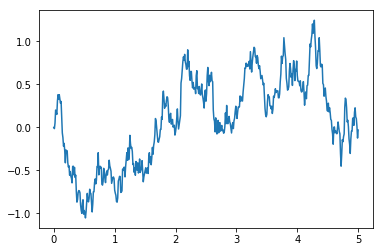

In [7]:
rnd.random_state(np.random.RandomState(seed=42), force=True)
x = [0.]
ts = [0.]; xs = [x]
for t, v in zip(sim.xtimes(0., 5., .01), rnd.multivatiate_normals(ndim=1)):
    x = X.propagate(t, v, ts[-1], x)
    ts.append(t); xs.append(x.flatten())
plt.plot(ts, xs);

## Multivariate Ornstein-Uhlenbeck process

In [8]:
X = proc.OrnsteinUhlenbeckProcess.create_from_cov(
        transition=[[10., 0.], [0., 10.]],
        mean=[3., 5.],
        cov=[[9., -7.5], [-7.5, 25.]])
x0 = npu.col(7., 8.)

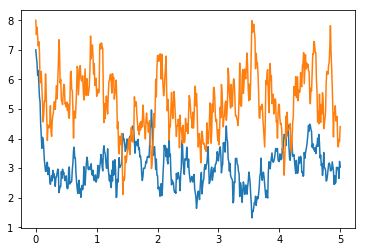

In [9]:
rnd.random_state(np.random.RandomState(seed=42), force=True)
em = sim.EulerMaruyama(process=X, initial_value=x0, times=sim.xtimes(start=0., stop=5., step=.01))
df = sim.run(em)
plt.plot(df);

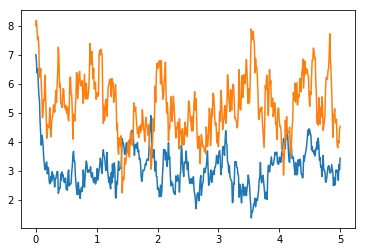

In [10]:
rnd.random_state(np.random.RandomState(seed=42), force=True)
x = x0
ts = [0.]; xs = [x0.flatten()]
for t, v in zip(sim.xtimes(0., 5., .01), rnd.multivatiate_normals(ndim=2)):
    x = X.propagate(t, v, ts[-1], x)
    ts.append(t); xs.append(x.flatten())
plt.plot(ts, xs);